In [1]:
%matplotlib inline

import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WB_data.csv")
#df.head(1)

In [3]:
#df.head().T

In [4]:
df = df.drop('Unnamed: 0', axis=1)
#df.head()

### Clean the release date and separate the first release with other ones

In [6]:
df['Release date'][0]

"['March 10, 1918 (New York City premiere)', 'April 29, 1918 (general)']"

In [7]:
df['Release date'] = df['Release date'].fillna('NaN')

In [8]:
def clean_name(x):
    name = x.split('(')
    name = name[0].replace("[", '')
    name = name.replace("'", '')
    name = name.replace("]", '')
    name = name.replace('"', '')
    name = name.replace('\xa0', ' ')
    name = name.replace('U.S.', '')
    name = name.replace('US', '')
    name = name.replace('-', ' ')
    return name.strip(" ")

df['First_release_date'] = df['Release date'].apply(lambda x: clean_name(x))

In [10]:
def fine_date(x):
    x = x.replace('\\xa0', ' ')
    #print(x)
    if x.split(','):
        first_releas_date = x.split(',')
        if len(first_releas_date)>1:           
            return(first_releas_date[0]+first_releas_date[1]).strip(" ")
        else:
            return x
    else:
        return x

df['First_release_date'] = df['First_release_date'].apply(lambda x: fine_date(x))

In [12]:
np.where(df['First_release_date']=='May 1929 March 1930', )

(array([224], dtype=int64),)

In [13]:
for n, i in enumerate (df['First_release_date']):
    if i == 'May 1929 March 1930':
        print("Yes", n)

Yes 224


In [14]:
 df.First_release_date[224:225]

224    May 1929 March 1930
Name: First_release_date, dtype: object

In [15]:
 df.First_release_date[224:225]= 'May 1929'

<ipython-input-15-f54356d40b9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.First_release_date[224:225]= 'May 1929'


In [16]:
np.where(df['First_release_date']=='January 18 19136', )

(array([621], dtype=int64),)

In [17]:
df.First_release_date[621:622]= 'January 18 1936'

<ipython-input-17-9742f246e75d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.First_release_date[621:622]= 'January 18 1936'


In [18]:
 df.First_release_date[621:622]

621    January 18 1936
Name: First_release_date, dtype: object

In [19]:
np.where(df['First_release_date']=='May 28', )

(array([], dtype=int64),)

In [20]:
df.First_release_date[190:191] = 'May 1928'

<ipython-input-20-e2b33503fbab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.First_release_date[190:191] = 'May 1928'


In [21]:

def change_year01(x, y):
    if y=='df_under_2000':
        date = x.split(' ')
        if len(date) >= 3 and len(date[2])<=2:
            date = date[0]+' '+date[1]+" "+"19"+date[2]
            #print(date)
            return date
        else:
            return x
    else:
        date = x.split(' ')
        if len(date) >= 3 and len(date[2])<=2:
            date = date[0]+' '+date[1]+" "+"20"+date[2]
            #print(date)
            return date
        else:
            return x

df_under_2000 = df[:2190]
df_above_2000 = df[2190:]
    
df_under_2000['First_release_date'] = df_under_2000['First_release_date'].apply(lambda x :change_year01(x, 'df_under_2000'))
#print('--'*10)
df_above_2000['First_release_date'] = df_above_2000['First_release_date'].apply(lambda x :change_year01(x, 'df_above_2000'))

df = pd.concat([df_under_2000, df_above_2000] )
#df

<ipython-input-21-400a61b0b7b3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under_2000['First_release_date'] = df_under_2000['First_release_date'].apply(lambda x :change_year01(x, 'df_under_2000'))
<ipython-input-21-400a61b0b7b3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_above_2000['First_release_date'] = df_above_2000['First_release_date'].apply(lambda x :change_year01(x, 'df_above_2000'))


In [22]:
#df['First_release_date'].min()

In [23]:
#df['First_release_date']

In [24]:
def to_datetime(x):

    try:
        return pd.to_datetime(x)
    except:
        print(x)
        pass

df['First_release_date'] = df['First_release_date'].apply(lambda x: to_datetime(x))

In [26]:
df['First_release_date'].isna().sum()

16

In [27]:
# fill the missing date with next row date
df['First_release_date'].fillna(method="bfill", inplace=True)

In [28]:
# c =0 
# for i in df['First_release_date']:
#     c+=1
#     print(i ,'     ', c)

In [29]:
# Extract Year, Month and Day from Datetime 
df['Year_release'] = df['First_release_date'].dt.year
df['month_release'] = df['First_release_date'].dt.month
df['day_release'] = df['First_release_date'].dt.day

#df.head(2).T

In [30]:
df['Year_release'].max()

2023

In [31]:
# make new featue of the release time
# looking to find which movie has more than one release time

#['March 10, 1918 (New York City premiere)', 'April 29, 1918 (general)']

df['has_second_Release_time'] = False
for i, s in enumerate (df['Release date']):
        d = s.split("', '")
        if len(d)>1:
            df['has_second_Release_time'][i] = True 

<ipython-input-31-3827f96bd24f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_second_Release_time'][i] = True


In [32]:
#df.info()

In [33]:
#df.describe()

In [34]:
df['Directed by'].isna().sum()

7

In [35]:
#df['Directed by'].head()

In [36]:
df['Director_missing'] =True
df['Director_assist'] = False

for i, con in enumerate(df['Directed by']):
    if not pd.isnull(con):
        s = con.split("', '")
        if len(s)>1:
            df['Director_assist'][i] = True
    else:
        df['Director_missing'][i]= False
        df['Directed by'][i] = 'missing'
        #print(i)

<ipython-input-36-7363fc4d11c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Director_assist'][i] = True
<ipython-input-36-7363fc4d11c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Director_missing'][i]= False
<ipython-input-36-7363fc4d11c6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Directed by'][i] = 'missing'


In [37]:
df['Directed by'].isna().sum()

0

In [38]:
#df['Directed_by_cleaned']= df['Directed by']

In [39]:
c = 1
df['Director_split']=0

for i, con in enumerate(df['Directed by']):
    #print()
    s = con.strip(' ').split("', '")
    if len(s)>1:
        df['Directed by'][i] = s[0].strip(' ').split("['")[1]
        df['Director_split'][i]=c
        df = df.append(df[i:i+1], ignore_index = True)
        df['Directed by'][len(df.index)-1] = s[1].strip(' ').split("']")[0]
        df['Director_split'][len(df.index)-2] = c
        c +=1
#print(c)
        #print(df['Directed by'][len(df.index)-1], s[1].strip(' '), len(df.index))       

<ipython-input-39-3fc4f8cb6f6d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Directed by'][i] = s[0].strip(' ').split("['")[1]
<ipython-input-39-3fc4f8cb6f6d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Director_split'][i]=c
<ipython-input-39-3fc4f8cb6f6d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Directed by'][len(df.index)-1] = s[1].strip(' ').split("']")[0]
<ipython-input-39-3fc4f8cb6f6d>:12: SettingWith

In [40]:
df['Directed by'] = df['Directed by'].apply(lambda x : clean_name(x))

In [42]:
#df.head().T

In [43]:
df['Written by'].isna().sum()

1304

In [44]:
# df['Written by'] =df['Written by'].fillna('missing')
# df['Written by'].isna().sum()

c = 1
df['WrittenBy_missing'] = True
df['Writer_split'] = 0 
for i, con in enumerate(df['Written by']):
    if not pd.isnull(con):
        s = con.split("', '")
        if len(s)>1:
            df['Writer_split'][i] = c
            #print(s[0], i)
            df['Written by'][i] = s[0].strip(' ')
            df = df.append(df[i:i+1], ignore_index = True)            
            df['Written by'][len(df.index)-1] = s[1].strip(' ')
            df['Writer_split'][len(df.index)-2] = c

            c +=1
            
    else:
        df['WrittenBy_missing'][i]= False
        df['Written by'][i] = 'missing'
        #print(i)
        
d = ['(screenplay)', '(story)', '(novel)', '(adaptation)', "(scenario & dialogue)']", "(scenario)']",\
     '(book)', "(novel", "(Credited)", '(autobiography)', '(memoirs)', '(screenplay', '(as Frank Christina)', '(as John Elder)'\
    '(writer)', '(play)', '(novel "Rear Guard")','(novel and screenplay)', '(articles)', "(additional dialogue)']",\
    '(uncredited contributor)', '(story, uncredited)', '(play "A Kuruzslo")','(play',"(adaptation)']", '(scenario & dialogue)',\
    '(scenario)', '(story; as Gregory Rogers)','(screen story)', '(intertitles)', '(as Gregory Rogers)', '(as John Elder)'\
    ,'(contributing writer)', '(writer) ', '(screenplay and adaptation) ', '(screen adaptation)', '(adaptation & dialogue)',\
    '(titles)', ]        
        
for i, con  in enumerate (df['Written by']):
    if con in d:
        df.drop(i, inplace=True )
    
df.reset_index(drop=True)

<ipython-input-44-20f4c960cafc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WrittenBy_missing'][i]= False
<ipython-input-44-20f4c960cafc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Written by'][i] = 'missing'
<ipython-input-44-20f4c960cafc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Writer_split'][i] = c
<ipython-input-44-20f4c960cafc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,title,Directed by,Written by,Based on,Produced by,Starring,Cinematography,Edited by,Production companies,Distributed by,...,First_release_date,Year_release,month_release,day_release,has_second_Release_time,Director_missing,Director_assist,Director_split,WrittenBy_missing,Writer_split
0,My Four Years in Germany,William Nigh,Charles A. Logue,"['My Four Years in Germany', 'by', 'James W. G...","['Harry Warner', 'Albert Warner', 'Sam Warner'...",Halbert Brown,Rial B. Schellinger,William Nigh,"['My Four Years in Germany Pictures, Inc.', 'W...","First National Exhibitors' Circuit, Inc.",...,1918-03-10,1918,3,10,True,True,True,1,True,0
1,Kaiser's Finish,John Josseph Harvey,missing,NaN,Sam Warner,"Earl Schenck', 'Claire Whitney', 'and Percy St...",Rial Schellinger,William Nigh,NaN,"['State Rights', 'Warner Bros. Pictures']",...,1918-11-02,1918,11,2,False,True,False,0,False,0
2,Open Your Eyes,Gilbert P. Hamilton,['C.B. Minty,NaN,NaN,"['Faire Binney', 'Mrs. Joupert', 'Jack Hopkins...",NaN,NaN,"['State Health Films Inc.', 'Warner Bros.']",Warner Bros.,...,1919-05-01,1919,5,1,False,True,False,0,True,1
3,Beware!,William Nigh,['James W. Gerard,NaN,NaN,"['Maurine Powers', 'Regina Quinn', 'Leslie Rye...",NaN,NaN,NaN,Warner Bros.,...,1919-06-01,1919,6,1,False,True,False,0,True,2
4,The Lost City,E.A. Martin,missing,NaN,NaN,"['Juanita Hansen', 'George Chesebro', 'Frank C...",NaN,NaN,NaN,Warner Bros. Pictures,...,1920-01-01,1920,1,1,False,True,False,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,Focus,John Requa,John Requa'],NaN,Denise Di Novi,"['Will Smith', 'Margot Robbie']",Xavier Pérez Grobet,Jan Kovac,"['RatPac-Dune Entertainment', 'Di Novi Picture...",Warner Bros. Pictures,...,2015-02-11,2015,2,11,True,True,True,122,True,940
3807,The Gallows,Travis Cluff,Travis Cluff'],NaN,"['Jason Blum', 'Guymon Casady', 'Dean Schnider...","['Reese Mishler', 'Pfeifer Brown', 'Ryan Shoos...",Edd Lukas,Chris Lofing,"['New Line Cinema', 'Blumhouse Productions', '...",Warner Bros. Pictures,...,2015-06-30,2015,6,30,True,True,True,123,True,941
3808,Vacation,John Francis Daley,John Francis Daley'],"['Characters', 'by', 'John Hughes']","['David Dobkin', 'Chris Bender']","['Ed Helms', 'Christina Applegate', 'Leslie Ma...",Barry Peterson,Jamie Gross,"['New Line Cinema', 'RatPac-Dune Entertainment...",Warner Bros. Pictures,...,2015-07-29,2015,7,29,False,True,True,124,True,942
3809,Teen Titans Go! To the Movies,Aaron Horvath,Aaron Horvath'],"['Teen Titans Go!', 'by Michael Jelenic and Aa...","['Aaron Horvath', 'Michael Jelenic', 'Peggy Re...","['Greg Cipes', 'Scott Menville', 'Khary Payton...",NaN,Nick Kenway,"['Warner Bros. Animation', 'DC Entertainment']",Warner Bros. Pictures,...,2018-07-22,2018,7,22,True,True,True,128,True,943


In [45]:
df['Written by'].isna().sum()

0

In [47]:
def clean_written_name(x):
    name = x.split('(')
    name = name[0].split(',')
    name = name[0].split('&')
    name = name[0].split(' based on ')
    name = name[0].split(' and ')
    name = name[0].replace("[", '')
    name = name.replace("'", '')
    name = name.replace("]", '')
    name = name.replace('"', '')
    name = name.replace('\\xa0', ' ')
    name = name.replace('U.S.', '')
    name = name.replace('US', '')
    name = name.replace('-', ' ')
    name = name.replace(':', '')
    name = name.replace('&', '')
    return name.strip(" ")

df['Written by']= df['Written by'].apply(lambda x: clean_written_name(x))

In [49]:
df['Written by'].isna().sum()

0

In [50]:
df['Based on'].isna().sum()

2240

In [51]:
df['Produced by'].isnull().sum()

635

In [52]:
%%time

df['ProducedBy_missing'] = True
df['split_producedBy'] = 0

c = 1
for i, con in enumerate(df['Produced by']):
    if not pd.isnull(con):
        s = con.split("', '")
        if len(s)>1:
            df['split_producedBy'][i] = c
            #print(s[0], i)
            df['Produced by'][i] = s[0].replace("['",'').strip(' ')
            df = df.append(df[i:i+1], ignore_index = True)
            if s[1] =='(uncredited executive producer)' or s[1] =='(uncredited)' or s[1] =='(exec. prod.)'\
                                                or s[1] =='(producer)'or  s[1] =='(executive producer)':
                df['Produced by'][len(df.index)-1] = s[2].strip(' ')
                df['split_producedBy'][len(df.index)-2] = c
            else:
                df['Produced by'][len(df.index)-1] = s[1].strip(' ')
                df['split_producedBy'][len(df.index)-2] = c
            c +=1
    else:
        df['ProducedBy_missing'][i]= False
        df['Produced by'][i] = 'missing'
        #print(i)

<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed ex

Wall time: 14.5 s


In [53]:
# c=0
# for i in df['Produced by']:   
#     print(i, (c))
#     c+=1

In [54]:
def clean_productBy_name(x):
    name = x.split('(')
    name = name[0].split(',')
    name = name[0].split('&')
    name = name[0].split(' based on ')
    name = name[0].split(' and ')
    name = name[0].replace("[", '')
    name = name.replace("'", '')
    name = name.replace("]", '')
    name = name.replace('"', '')
    name = name.replace('\\xa0', ' ')
    name = name.replace('U.S.', '')
    name = name.replace('US', '')
    name = name.replace('-', ' ')
    name = name.replace(':', '')
    name = name.replace('&', '')
    return name.strip(" ")

df['Produced by']= df['Produced by'].apply(lambda x: clean_productBy_name(x))

In [56]:
df['Starring'].isna().sum()

82

In [57]:
%%time

def modify_name(x):
    if not pd.isnull(x):
        return x.replace('"', "'")
    else:
        return x

df['Starring'] = df['Starring'].apply(lambda x: modify_name(x))


df['Starring_missing'] = True
df['split_Starring'] = 0

c = 1
for i, con in enumerate(df['Starring']):
    if not pd.isnull(con):
        s = con.split("', '")
        if len(s)>1:
            df['split_Starring'][i] = c
            #print(s[0], i)
            df['Starring'][i] = s[0].replace("['",'').strip(' ')
            df = df.append(df[i:i+1], ignore_index = True)
            if s[1]:
                df['Starring'][len(df.index)-1] = s[1].strip(' ')
                df['split_Starring'][len(df.index)-2] = c
            elif s[2]:
                df['Starring'][len(df.index)-1] = s[2].strip(' ')
                df['split_Starring'][len(df.index)-2] = c
            elif s[3]:
                df['Starring'][len(df.index)-1] = s[3].strip(' ')
                df['split_Starring'][len(df.index)-2] = c
            c +=1
    else:
        df['Starring_missing'][i]= False
        df['Starring'][i] = 'missing'
        #print(i)

<timed exec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed e

Wall time: 1min 10s


In [59]:
# remove the colummns that we dont need
clean_columns = ['First_release_date', 'Release date', 'Release date (datetime)','Based on','Years', 'Owner', 'Original work','Created by',\
                'Basis', 'Italian', 'Hanja', 'Dutch', 'Revised Romanization', 'Hangul', 'German', 'Screen story by',\
                'Hepburn','Japanese','Music by','Color process','Narrated by','Music','Lyrics','Book','Productions'\
                 ,'Awards','Countries','Animation by', 'Date premiered','Place premiered','Original language', 'Genre', 'Setting'\
                ,'French','Traditional', 'Simplified', 'Mandarin', 'Cantonese','Literally','Adaptation by', 'Layouts by','Backgrounds by',\
                'Spanish', 'Cinematography','Edited by', 'Distributed by', 'Running time','metascore',\
                'Metacritic', 'Story by', 'Screenplay by','Budget','Box office',  ]


for i in clean_columns:
    df = df.drop([i], axis=1)



In [60]:
df.to_csv('clean_data_till_starring.csv',index= False)

In [61]:
df = pd.read_csv('clean_data_till_starring.csv')

In [62]:
df.head()

,title,Directed by,Written by,Produced by,Starring,Production companies,Country,Language,Running time (int),Budget (float),...,has_second_Release_time,Director_missing,Director_assist,Director_split,WrittenBy_missing,Writer_split,ProducedBy_missing,split_producedBy,Starring_missing,split_Starring
0,My Four Years in Germany,William Nigh,Charles A. Logue,Harry Warner,Halbert Brown,"['My Four Years in Germany Pictures, Inc.', 'W...",United States,Silent (English intertitles ),108.0,NaN,...,True,True,True,1,True,0,True,1,True,0
1,Kaiser's Finish,John Josseph Harvey,missing,Sam Warner,Earl Schenck,NaN,United States,Silent,NaN,NaN,...,False,True,False,0,False,0,True,0,True,1
2,Open Your Eyes,Gilbert P. Hamilton,C.B. Minty,missing,Faire Binney,"['State Health Films Inc.', 'Warner Bros.']",United States,Silent (English intertitles ),70.0,NaN,...,False,True,False,0,True,1,False,0,True,2
3,Beware!,William Nigh,James W. Gerard,missing,Maurine Powers,NaN,United States,Silent,9.0,NaN,...,False,True,False,0,True,2,False,0,True,3
4,The Lost City,E.A. Martin,missing,missing,Juanita Hansen,NaN,United States,Silent,15.0,NaN,...,False,True,False,0,False,0,False,0,True,4


In [63]:
df['Running time (int)'].isna().sum()

348

In [64]:
df['Budget (float)'].isna().sum()

4933

In [65]:
df['Box office (float)'].isna().sum()

4083

In [66]:
df['imdb'].isna().sum()

7247

In [67]:
sales_box_office =[]
for i, con in enumerate(df['Box office (float)']):
    if con > 5*1e7 and df['imdb'][i] > 6:
        sales_box_office.append(i)
print(sales_box_office)

[969, 1001, 2316, 2317, 2473, 3343, 3680, 3955, 4487, 4488, 4614, 5025, 5173, 6107, 6137, 7400, 7401, 7552, 8349, 8667, 8922, 9442, 9443, 9566, 9963, 10104]


In [68]:
# for i in sales_box_office:
#     print('film name: ', df['title'][i],'  ',df['Box office (float)'][i])
    

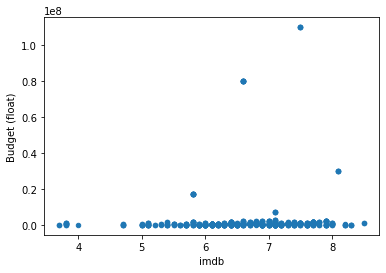

In [69]:
df.plot('imdb','Budget (float)', kind='scatter');

In [70]:
bugget =[]
for i, con in enumerate(df['Budget (float)']):
    if con > .1*1e8 and df['imdb'][i] > 1:
        bugget.append(i)
print(bugget)

[2316, 2317, 2473, 2773, 3680, 3740, 4487, 4488, 4614, 4850, 5173, 5215, 7400, 7401, 7552, 7838, 8667, 8721, 9442, 9443, 9566, 9793, 10104, 10145]


In [71]:
# for i in bugget:
#     print('film name: ', df['title'][i],'  ',df['Budget (float)'][i])

In [72]:
df['Production companies'].head()

0    ['My Four Years in Germany Pictures, Inc.', 'W...
1                                                  NaN
2          ['State Health Films Inc.', 'Warner Bros.']
3                                                  NaN
4                                                  NaN
Name: Production companies, dtype: object

In [73]:
df['Production company'].head()

0                        NaN
1      Warner Bros. Pictures
2                        NaN
3               Warner Bros.
4    Selig Polyscope Company
Name: Production company, dtype: object

In [74]:
df['Production company'].isna().sum()

5823

In [75]:
df.shape

(10175, 27)

In [76]:
df = pd.read_csv('clean_data_till_starring.csv')

In [77]:
# merge Production company and Production companies
df['Production_companies'] = False


for i, con in enumerate(df['Production companies']):
    if not pd.isnull(con):
        con = con.replace('"', "'")
        df['Production_companies'][i] = True
        split_companies = con.split("', '")
        split_companies = split_companies[0].replace("['","")
        split_companies = split_companies.replace("']","")
        if pd.isnull(df['Production company'][i]):   
            df['Production company'][i] = split_companies
            #print(split_companies, i)
        else:
            pass
            #print('Production company in not null: ', df['Production company'][i], i)
    else:
        pass
        #print('nan', i)


<ipython-input-77-dc1b0804388f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production_companies'][i] = True
<ipython-input-77-dc1b0804388f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production company'][i] = split_companies


In [78]:
# remove the Production companies column

df.drop('Production companies', axis=1, inplace=True)

In [79]:
#df.columns

In [80]:
df['Production_company_missing'] = False
def fill_missing(x):
    if pd.isnull(x):
        return 'missing'
    else:
        return x

df['Production company'] = df['Production company'].apply(lambda x: fill_missing(x))


for i, con in enumerate (df['Production company']):
    if con == 'missing':
        df['Production_company_missing'][i]=True
        

<ipython-input-80-c373d8fb77e5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production_company_missing'][i]=True


In [81]:
# merge Language and languages
df['several_languages'] = False


for i, con in enumerate(df['Languages']):
    if not pd.isnull(con):
        con = con.replace('"', "'")
        df['several_languages'][i] = True
        split_language = con.split("', '")
        split_language = split_language[0].replace("['","")
        split_language = split_language.replace("']","")
        if pd.isnull(df['Language'][i]):   
            df['Language'][i] = split_language
            #print(split_language, i)
        else:
            pass
            #print('Language in not null: ', df['Language'][i], i)
    else:
        pass
        #print('nan', i

<ipython-input-81-0b92d65a61b5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['several_languages'][i] = True
<ipython-input-81-0b92d65a61b5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Language'][i] = split_language


In [82]:
# fill missing data in Language column

df['Language_missing'] = False

def fill_missing(x):
    if pd.isnull(x):
        return 'missing'
    else:
        return x

df['Language'] = df['Language'].apply(lambda x: fill_missing(x))


for i, con in enumerate (df['Language']):
    if con == 'missing':
        df['Language_missing'][i]=True

<ipython-input-82-6fa1baa8c671>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Language_missing'][i]=True


In [83]:
# remove the Languages column

df.drop('Languages', axis=1, inplace=True)

In [84]:
df.to_csv('clean_data_till_language.csv', index=False)

In [85]:
df = pd.read_csv('clean_data_till_language.csv')

In [86]:
df.head()

,title,Directed by,Written by,Produced by,Starring,Country,Language,Running time (int),Budget (float),Box office (float),...,WrittenBy_missing,Writer_split,ProducedBy_missing,split_producedBy,Starring_missing,split_Starring,Production_companies,Production_company_missing,several_languages,Language_missing
0,My Four Years in Germany,William Nigh,Charles A. Logue,Harry Warner,Halbert Brown,United States,Silent (English intertitles ),108.0,NaN,NaN,...,True,0,True,1,True,0,True,False,False,False
1,Kaiser's Finish,John Josseph Harvey,missing,Sam Warner,Earl Schenck,United States,Silent,NaN,NaN,NaN,...,False,0,True,0,True,1,False,False,False,False
2,Open Your Eyes,Gilbert P. Hamilton,C.B. Minty,missing,Faire Binney,United States,Silent (English intertitles ),70.0,NaN,NaN,...,True,1,False,0,True,2,True,False,False,False
3,Beware!,William Nigh,James W. Gerard,missing,Maurine Powers,United States,Silent,9.0,NaN,NaN,...,True,2,False,0,True,3,False,False,False,False
4,The Lost City,E.A. Martin,missing,missing,Juanita Hansen,United States,Silent,15.0,NaN,NaN,...,False,0,False,0,True,4,False,False,False,False


In [87]:
# filling run time column
df['Running_time_missing'] = False

for i, con in enumerate (df['Running time (int)']):
    if pd.isnull(con):
        df['Running_time_missing'][i] = True
        df['Running time (int)'][i] = df['Running time (int)'].median()
        #print(i)
    else:
        pass

<ipython-input-87-a893940cc36a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Running_time_missing'][i] = True
<ipython-input-87-a893940cc36a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Running time (int)'][i] = df['Running time (int)'].median()


In [88]:
# filling Buget row using avrage price that need for each make a min of film 

def avrage_cost(cost, start_year, end_year ):
    all_costs = []
    for i , con in enumerate(df['Year_release']):
        if (df['Year_release'].min()+start_year) <= con <= (df['Year_release'].min()+ end_year):
            if not pd.isna(cost[i]):
                all_costs.append(cost[i])
    #print(all_costs, np.mean(all_costs) )
    return round(np.mean(all_costs))

def avarage_time(minOfMovie, start_year, end_year):
    all_times = []
    for i , con in enumerate(df['Year_release']):
            if (df['Year_release'].min()+start_year) <= con <= (df['Year_release'].min()+ end_year):
                 all_times.append(minOfMovie[i])
    #print(all_times, np.mean(all_times))
    return round(np.mean(all_times))


def fill_missing_money(x, minOfMovie, missing):
    for i in range(0, (df['Year_release'].max()-df['Year_release'].min()), 10):
        avrage = avrage_cost(x, i, i+10) // avarage_time(minOfMovie, i, i+10)
        for j, con in enumerate(minOfMovie):
            if (df['Year_release'].min()+i) <= (df['Year_release'][j]) <= (df['Year_release'].min()+(i+10)):
                if pd.isnull(x[j]):
                    missing[i] = True
                    x[j] = avrage * con
                    #print(j, x[j], avrage, con, df['Year_release'][j])
                else:
                    pass
            else:
                pass

In [89]:
df['Budget_missing'] = False
fill_missing_money(df['Budget (float)'], df['Running time (int)'], df['Budget_missing'])

<ipython-input-88-55c3da02f39e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing[i] = True
<ipython-input-88-55c3da02f39e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[j] = avrage * con


In [90]:
df['boxOffice_missing'] = False
fill_missing_money(df['Box office (float)'], df['Running time (int)'], df['boxOffice_missing'])

<ipython-input-88-55c3da02f39e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing[i] = True
<ipython-input-88-55c3da02f39e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[j] = avrage * con


In [91]:
# clean and fill imbd data
df['imdb_missing'] = False
for i, con in enumerate(df['imdb']):
    if pd.isna(con):
        df['imdb_missing'][i] = True
        df['imdb'][i] = df['imdb'].median() 
      

<ipython-input-91-c6ed9fc7b492>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdb_missing'][i] = True
<ipython-input-91-c6ed9fc7b492>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdb'][i] = df['imdb'].median()


In [92]:
df['imdb'].median() 

6.3

In [93]:
df.to_csv('cleaned_data.csv', index=False)